In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
!pip install --upgrade scikit-learn
#!pip install --upgrade sagemaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.4 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

# Initialize the count vectorizer with the parameter: binary=True
binary_vectorizer = CountVectorizer(binary=True)

# fit_transform() function fits the text data and gets the binary BoW vectors
x = binary_vectorizer.fit_transform(sentences)

In [3]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1]])

In [4]:
binary_vectorizer.vocabulary_

{'this': 8,
 'document': 1,
 'is': 3,
 'the': 6,
 'first': 2,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [5]:
print(binary_vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [6]:
new_sentence = ["This is the new sentence"]
new_vectors = binary_vectorizer.transform(new_sentence)

In [7]:
new_vectors.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1]])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["This document is the first document", "This document is the second document", "and this is the third one"]

# Initialize the count vectorizer
count_vectorizer = CountVectorizer()

xc = count_vectorizer.fit_transform(sentences)

xc.toarray()

array([[0, 2, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1]])

In [9]:
new_sentence = ["This is the new sentence"]
new_vectors = count_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1]])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(use_idf=False)

x = tf_vectorizer.fit_transform(sentences)

x.toarray()

array([[0.        , 0.70710678, 0.35355339, 0.35355339, 0.        ,
        0.        , 0.35355339, 0.        , 0.35355339],
       [0.        , 0.70710678, 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.35355339],
       [0.40824829, 0.        , 0.        , 0.40824829, 0.40824829,
        0.        , 0.40824829, 0.40824829, 0.40824829]])

In [11]:
new_sentence = ["This is the new sentence"]
new_vectors = tf_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.57735027]])

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

xf = tfidf_vectorizer.fit_transform(sentences)

xf.toarray()

array([[0.        , 0.7284449 , 0.47890875, 0.28285122, 0.        ,
        0.        , 0.28285122, 0.        , 0.28285122],
       [0.        , 0.7284449 , 0.        , 0.28285122, 0.        ,
        0.47890875, 0.28285122, 0.        , 0.28285122],
       [0.49711994, 0.        , 0.        , 0.29360705, 0.49711994,
        0.        , 0.29360705, 0.49711994, 0.29360705]])

In [13]:
new_sentence = ["This is the new sentence"]
new_vectors = tfidf_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.57735027]])

In [14]:
tfidf_vectorizer.idf_

array([1.69314718, 1.28768207, 1.69314718, 1.        , 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.        ])

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

tfidf_vectorizer = TfidfVectorizer()
xf = tfidf_vectorizer.fit_transform(sentences)
xf.toarray()

array([[0.        , 0.7284449 , 0.47890875, 0.28285122, 0.        ,
        0.        , 0.28285122, 0.        , 0.28285122],
       [0.        , 0.7284449 , 0.        , 0.28285122, 0.        ,
        0.47890875, 0.28285122, 0.        , 0.28285122],
       [0.49711994, 0.        , 0.        , 0.29360705, 0.49711994,
        0.        , 0.29360705, 0.49711994, 0.29360705]])

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [17]:
trainDisasterData = pd.read_csv("train.csv")
testDisasterData = pd.read_csv("test.csv")

In [18]:
trainDisasterData.dropna(subset=['target'], inplace=True)

In [19]:
trainDisasterData.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [20]:
testDisasterData.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [21]:
XTrainData = trainDisasterData['text']
yTrainData = trainDisasterData['target']

In [22]:
XTestData = testDisasterData['text']
yTestData = testDisasterData['target']

In [23]:
tfidfVectorizer = TfidfVectorizer()
XTrainTfidf = tfidfVectorizer.fit_transform(XTrainData)
XTestTfidf = tfidfVectorizer.transform(XTestData)

In [24]:
def trainAndEvaluateModel(model, XTrainData, yTrainData, XTestData, yTest=None):
    model.fit(XTrainData, yTrainData)
    if yTest is not None:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(XTestData)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(XTestData)
            y_prob = 1 / (1 + np.exp(-y_score))
        else:
            raise AttributeError("Model does not have a probability estimation method.")

        y_pred = model.predict(XTestData)
        accuracy = accuracy_score(yTest, y_pred)
        return accuracy, y_prob, y_pred
    else:
        return None, None, None

In [25]:
XTrainData, X_val, yTrainData, y_val = train_test_split(XTrainTfidf, yTrainData, test_size=0.2, random_state=42)

In [26]:
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "RidgeClassifier": RidgeClassifier()
}

In [27]:
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    accuracy, y_prob, y_pred = trainAndEvaluateModel(model, XTrainData, yTrainData, X_val, y_val)
    if accuracy is not None:
        print(f"Accuracy for {model_name}: {accuracy}")

Training and evaluating RandomForestClassifier...
Accuracy for RandomForestClassifier: 0.7859487852921865
Training and evaluating LogisticRegression...
Accuracy for LogisticRegression: 0.8010505581089954
Training and evaluating RidgeClassifier...
Accuracy for RidgeClassifier: 0.8089297439264609


In [28]:
yTrainPred = model.predict(XTrainData)
train_f1 = f1_score(yTrainData, yTrainPred)
print(f"F1 Score for {model_name} on training set: {train_f1}")

val_f1 = f1_score(y_val, y_pred)
print(f"F1 Score for {model_name} on validation set: {val_f1}")


F1 Score for RidgeClassifier on training set: 0.9620945681906995
F1 Score for RidgeClassifier on validation set: 0.75850622406639


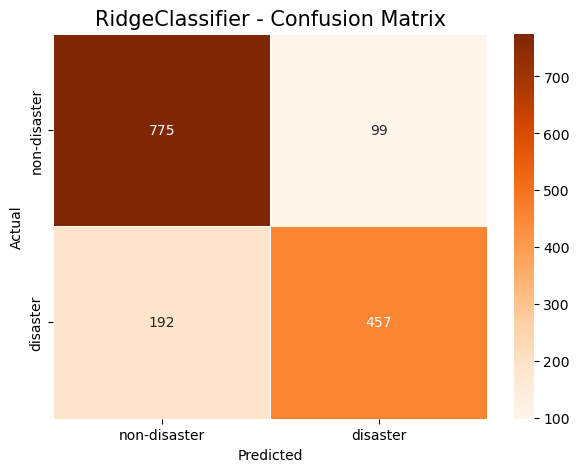

In [29]:
confMatrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confMatrix, annot=True, linewidths=0.4, cmap="Oranges", fmt='.4g', ax=ax)
ax.set_xticklabels(["non-disaster", "disaster"])
ax.set_yticklabels(["non-disaster", "disaster"])
ax.set_title(f"{model_name} - Confusion Matrix", fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

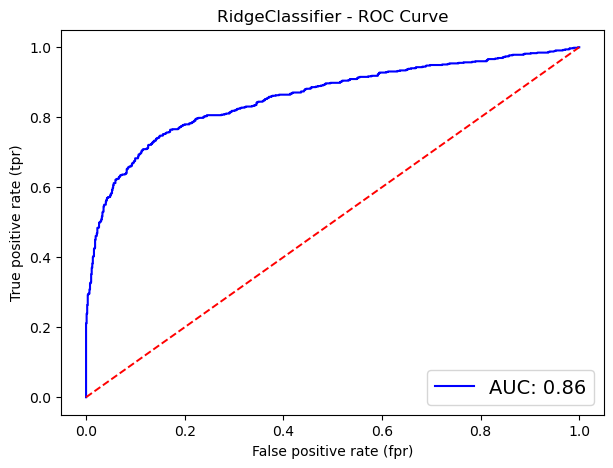

In [31]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC: {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14, loc="lower right")
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title(f"{model_name} - ROC Curve")
plt.show()

In [32]:
if model_name == "RidgeClassifier":
    yTestPred = model.predict(XTestTfidf)
    submissionResults = pd.DataFrame({"id": testDisasterData.id, "target": yTestPred}).astype("int64")
    submissionResults.to_csv("submission.csv", index=False)